In [55]:
import torch 
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
import CustomTransformer as ct
%inline matplotlib


UsageError: Line magic function `%inline` not found.


In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:

data = pd.read_table('fra.txt', header= None)

In [7]:
data.rename(columns= {0: 'English', 1: 'French', 2: 'Citation'}, inplace= True)

In [8]:
pattern = r"[!'#$%&()*+,-./:;<=>?@[\]^`{|}~“”‘’«»‹›„‚–—…·•¡¿’\"\']"

eng_sent, french_sent = [], []

for e in range(len(data['English'])):
    eng_sent.append(re.sub(pattern, "", data['English'][e]))
    french_sent.append(re.sub(pattern, "", data['French'][e]))

In [9]:
print(len(eng_sent))
print(len(french_sent))

229803
229803


In [10]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_small_tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-small-uncased")

In [11]:
eng_token = [tokenizer.encode(text, add_special_tokens= True) for text in eng_sent]
fren_token = [tokenizer.encode(text, add_special_tokens= True) for text in french_sent]

In [12]:
model = BertModel.from_pretrained('bert-base-uncased')

In [13]:
def padding(tokens, max_len):
    temp = []
    for token in tokens:
        if max_len > len(token):
            temp.append(token + [tokenizer.pad_token_id 
                                 for i in range(max_len - len(token))])
        else:
            temp.append(token[:max_len])

    return temp

In [14]:
def text_embedding(batch_tokens, max_len):
    batch_padded_tokens = padding(batch_tokens, max_len)
    tokens_tensor = torch.tensor(batch_padded_tokens).to(device)
    with torch.no_grad():
        output = model(tokens_tensor)
        embeddings = output.last_hidden_state
    return embeddings

Average len: 8


{'whiskers': [<matplotlib.lines.Line2D at 0x2b97ed3c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2b97ed900>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b97ed120>],
 'medians': [<matplotlib.lines.Line2D at 0x2b97ede40>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b97ee380>],
 'means': [<matplotlib.lines.Line2D at 0x2b97ee0e0>]}

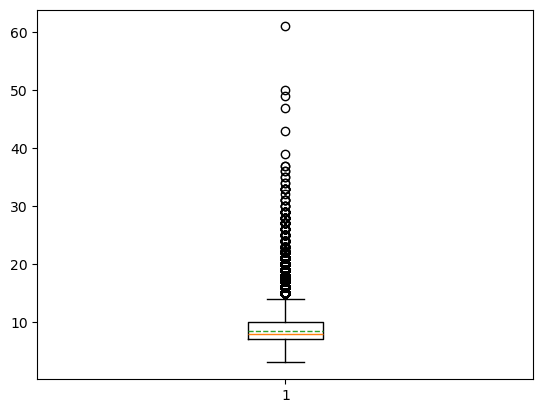

In [15]:
eng_sum = 0
eng_token_len = []
for tokens in eng_token:
    eng_sum += len(tokens)
    eng_token_len.append(len(tokens))

eng_avg_len = eng_sum // len(eng_token)
print("Average len: {}".format(eng_avg_len))
plt.boxplot(eng_token_len, meanline= True, showmeans= True)

Average len: 12


{'whiskers': [<matplotlib.lines.Line2D at 0x2c3b558a0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c3b55cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c3b55600>],
 'medians': [<matplotlib.lines.Line2D at 0x2c3b56200>],
 'fliers': [<matplotlib.lines.Line2D at 0x2c3b56740>],
 'means': [<matplotlib.lines.Line2D at 0x2c3b564a0>]}

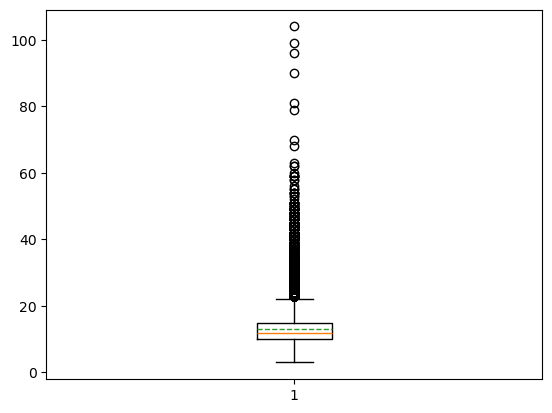

In [16]:
fren_sum = 0
fren_token_len = []
for tokens in fren_token:
    fren_sum += len(tokens)
    fren_token_len.append(len(tokens))

fren_avg_len = fren_sum // len(fren_token)

print("Average len: {}".format(fren_avg_len))
plt.boxplot(fren_token_len, meanline= True, showmeans= True)

In [17]:
batch_size = 1000

eng_embedding = []
for i in tqdm(range(0, len(eng_token), batch_size), "Embedding", colour= "green"):
    batch_token = eng_token[i : i+batch_size]
    eng_embedding.extend(text_embedding(batch_token, eng_avg_len))

len(eng_embedding)

Embedding: 100%|██████████| 230/230 [12:03<00:00,  3.14s/it]


229803

In [18]:
batch_size = 10000

fren_embedding = []
for i in tqdm(range(0, len(fren_token), batch_size), "Embedding", colour= "green"):
    batch_token = fren_token[i : i+batch_size]
    fren_embedding.extend(text_embedding(batch_token, fren_avg_len))

len(fren_embedding)

Embedding: 100%|██████████| 23/23 [18:14<00:00, 47.61s/it]


229803

In [46]:
eng_token[0]

[101, 2175, 102]

In [40]:
fren_token[0]

[101, 12436, 102]

In [49]:
vocab = len(tokenizer.vocab)

In [94]:
device = torch. device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.tensor([eng_token[0]]).to(device)
trg = torch.tensor([fren_token[0]]).to(device)
src_pad_idx = 0
trg_pad_idx = 0
src_vocab_size = vocab
trg_vocab_size = vocab
model = ct.Transformer(src_vocab_size, trg_vocab_size, src_pad_idx, trg_pad_idx).to(device)
out = model(x, trg)
print(tokenizer.decode(torch.argmax(out, dim= -1)[0]))




[unused250] slogan collecting


In [91]:
tokenizer.decode([101, 12436, 102])

'[CLS] va [SEP]'